In [33]:
from PIL import Image
import numpy as np
import math
import random
import pandas as pd
import webcolors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

FOLDER_PATH = 'data/'

In [34]:
def load_image(filename: str, resize: tuple):
  img = Image.open(filename)
  img = img.resize(resize)
  return np.array(img).astype(np.float64)

In [35]:
def euclidean_distance(p1, p2):
    return math.sqrt(sum((px - qx) ** 2.0 for px, qx in zip(p1, p2)))

In [36]:
def manhattan_distance(p1, p2):
  return sum(abs(px - qx) for px, qx in zip(p1, p2))

In [37]:
def nearest_centroid(point, centroids, distance):
  flag = False
  idx_centroid, min_distance = 0, 0

  for i in range(len(centroids)):
    current_distance = distance(point, centroids[i])
    if not flag or current_distance <  min_distance:
      flag = True
      
      idx_centroid = i
      min_distance = current_distance

  return idx_centroid, min_distance

In [38]:
def lloyd(data, k, iters, type="means", distance="euclidian"):
  distance_func = euclidean_distance if distance == "euclidian" else manhattan_distance

  go = True
  epoch_c = 0
  error = 0

  cluster_array = np.zeros(len(data))

  centroids = random.choices(data, k=k)

  while go:
    for element, i in zip(data, range(len(cluster_array))):
      idx_centroid, min_distance = nearest_centroid(
        element, centroids, distance_func)

      error += min_distance
      cluster_array[i] = idx_centroid

    if type == "means":
      for i in range(k):
        cluster_average = []
        for element, j in zip(data, range(len(cluster_array))):
          if cluster_array[j] == i:
            cluster_average.append(element)

        centroids[i] = np.average(cluster_average, axis=0)
    
    elif type == "mediods":
        min_distance_array = np.zeros(k)
        for element, i in zip(data, range(len(cluster_array))):
          distance = 0
          for element_j, j in zip(data, range(len(cluster_array))):
            if j is not i:
              if cluster_array[j] == cluster_array[i]:
                distance += distance_func(element, element_j)

          if min_distance_array[int(cluster_array[i])] == 0 or min_distance_array[int(cluster_array[i])] > distance:
             min_distance_array[int(cluster_array[i])] = distance
             centroids[int(cluster_array[i])] = element


    epoch_c += 1
    go = False if epoch_c > iters else True

    return centroids, error



In [39]:

def rgb2hex(r,g,b):
    return "#{:02x}{:02x}{:02x}".format(r,g,b)

In [40]:
def print_color(color_palette):
  sample = []
  for color in color_palette:
    sample.append(rgb2hex(int(color[0]), int(color[1]), int(color[2])))

  sns.palplot(sample)

In [41]:
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

In [42]:
def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

In [43]:
img = "img_01.png"

img_array = load_image(FOLDER_PATH + img, (128, 128))
img_array = img_array.reshape(128*128, 3)

color_palletes, error = lloyd(img_array, 5, 1e5, "mediods", "euclidean")

for color in color_palletes:
  print(get_colour_name(color))

(None, 'chocolate')
(None, 'chocolate')
(None, 'chocolate')
(None, 'maroon')
(None, 'saddlebrown')


Error: 360789.0


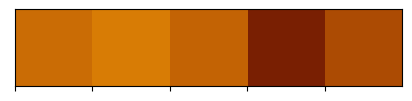

In [44]:
print_color(color_palletes)
print("Error: " + str(error))


In [45]:
img = "img_02.png"

img_array = load_image(FOLDER_PATH + img, (128, 128))
img_array = img_array.reshape(128*128, 3)

color_palletes, error = lloyd(img_array, 5, 1e5, type="means", distance="euclidian")

for color in color_palletes:
  print(get_colour_name(color))

(None, 'indigo')
(None, 'darkslateblue')
(None, 'darkslategray')
(None, 'darkmagenta')
(None, 'rosybrown')


Error: 479959.1131948678


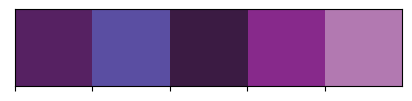

In [46]:
print_color(color_palletes)
print("Error: " + str(error))

In [47]:
img = "img_03.png"

img_array = load_image(FOLDER_PATH + img, (128, 128))
img_array = img_array.reshape(128*128, 3)

color_palletes, error = lloyd(img_array, 5, 1e5, type="means", distance="manhattan")

for color in color_palletes:
  print(get_colour_name(color))

(None, 'lightgray')
(None, 'rosybrown')
(None, 'darkolivegreen')
(None, 'dimgray')
(None, 'black')


Error: 825987.0


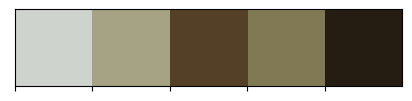

In [48]:
print_color(color_palletes)
print("Error: " + str(error))

In [49]:
img = "img_04.png"

img_array = load_image(FOLDER_PATH + img, (128, 128))
img_array = img_array.reshape(128*128, 3)

color_palletes, error = lloyd(img_array, 5, 1e5, type="mediods", distance="manhattan")

for color in color_palletes:
  print(get_colour_name(color))

(None, 'firebrick')
(None, 'darkslategray')
(None, 'tomato')
(None, 'lightslategray')
(None, 'darksalmon')


Error: 1105935.0


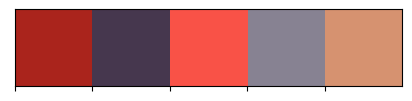

In [50]:
print_color(color_palletes)
print("Error: " + str(error))

In [51]:
img = "img_05.png"

img_array = load_image(FOLDER_PATH + img, (128, 128))
img_array = img_array.reshape(128*128, 3)

color_palletes, error = lloyd(img_array, 5, 1e5, type="means", distance="euclidean")

for color in color_palletes:
  print(get_colour_name(color))

(None, 'black')
(None, 'black')
(None, 'dimgray')
(None, 'darkslategray')
(None, 'black')


Error: 738509.0


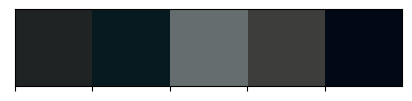

In [52]:
print_color(color_palletes)
print("Error: " + str(error))

A lo largo de la expirentación, el algoritmo con parametros means y con el cálculo de distancia euclidiana fue el que posee menos tasa de error. Sin embargo, cabe destacar que, aunque el de mediods tiende a ser "más preciso" al destacar los diferentes colores. 